# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?APPID="+ weather_api_key
print(url)
print(cities)
# set up lists to hold reponse info
cities = []
lat = []
temp = []
humidity = []
wind  = []
clouds = []
sunset = []

# Loop through the list of cities and perform a request for data on each
for i in range(len(cities)):
    response = requests.get(url +"&q="+cities[i]).json()
    print(response)
    print(str(i+1) + "."+ cities[i])
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

    humidity.append(response['main']['humidity'])
    wind.append(response['wind']['humidity'])
    
    
print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

http://api.openweathermap.org/data/2.5/weather?APPID=d8f90b9ab38ca4b08855bb3e0badf2a5
['sentyabrskiy', 'bloemhof', 'illoqqortoormiut', 'port blair', 'sangin', 'mayo', 'busselton', 'riyadh', 'sitka', 'tasiilaq', 'rafai', 'cape town', 'east london', 'shirokiy', 'bluff', 'saint-philippe', 'peniche', 'braslav', 'los llanos de aridane', 'yaypan', 'vardo', 'teguise', 'saskylakh', 'ilulissat', 'hambantota', 'puerto ayora', 'arona', 'taolanaro', 'olafsvik', 'codrington', 'opobo', 'kenai', 'punta arenas', 'avarua', 'constitucion', 'bathsheba', 'norman wells', 'fortuna', 'kavaratti', 'ushuaia', 'dunedin', 'luderitz', 'sinnamary', 'lebu', 'ladario', 'mar del plata', 'salalah', 'kapaa', 'atuona', 'rikitea', 'snyder', 'hermanus', 'tautira', 'awbari', 'mataura', 'the pas', 'longyearbyen', 'san cristobal', 'khatanga', 'port alfred', 'sam phran', 'kurilsk', 'hasaki', 'whitehorse', 'quang ngai', 'shiyan', 'thompson', 'grand gaube', 'tabou', 'prince rupert', 'north bend', 'ondjiva', 'marabba', 'kiunga',

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#as citi.py is not working in my computer so checking the api key and url is right

url = "http://api.openweathermap.org/data/2.5/weather?APPID=d8f90b9ab38ca4b08855bb3e0badf2a5"
response = requests.get(url +"&q=Miami").json()
print(response)

{'coord': {'lon': -80.1937, 'lat': 25.7743}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 302.09, 'feels_like': 307.51, 'temp_min': 299.81, 'temp_max': 304.27, 'pressure': 1021, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 280, 'gust': 1.34}, 'clouds': {'all': 20}, 'dt': 1626957548, 'sys': {'type': 2, 'id': 2009435, 'country': 'US', 'sunrise': 1626950529, 'sunset': 1626999118}, 'timezone': -14400, 'id': 4164138, 'name': 'Miami', 'cod': 200}


In [17]:
#Export the city data into a .csv.
#Display the DataFrame

weather_dict ={
    "City": cities,
    "lat" : lat,
    "temp": temp, 
    "humidity": humidity, 
    "wind": wind 
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,lat,temp,humidity,wind


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

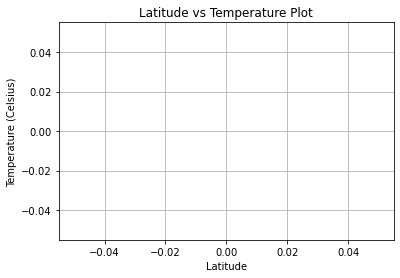

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature Plot")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitideandTemperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

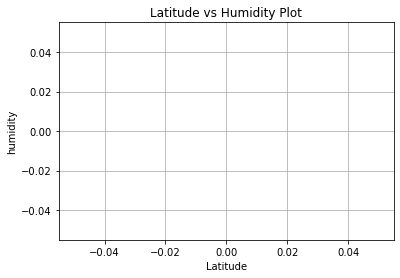

In [18]:
#Build a scatter plot for Latitude vs Humidity
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity Plot")
plt.ylabel("humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitideandHumidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression